## Parser for getting input features from .FIT files:

In [47]:
def fit_parse(filename):
    ##Open file: 
    print("Reading file...")
    #filename = "2018-11-09-11-16-27.csv"
    file = open(filename, "r")

    acc_x = []
    acc_y = []
    acc_z = []

    gyro_x = []
    gyro_y = []
    gyro_z = []

    mag_x = []
    mag_y = []
    mag_z = []

    distance_14_array = []
    speed_14_array = []
    altitude_14_array = []
    das_14_time = []

    distance_0_array = []
    speed_0_array = []
    altitude_0_array = []
    velocity_0_array = []
    das_0_time = []

    last_sec = 0
    last_ms = 0

    velocity_x_array = []
    velocity_y_array = []
    velocity_z_array = []

    #Data,10,gyroscope_data,timestamp,"4",s
    #Data,11,accelerometer_data,timestamp, "4", s
    #Data,12,magnetometer_data,timestamp,"4",s

    ##Read in lines, append values to arrays:
    count = 0
    for full_line in file:
        line = full_line.split(',')

        #print(line)

        #Add gyroscope data: 
        if "gyroscope_data" in line: 
            timestamp = line[4]
            gyro_x_vals = line[10].strip('\"')
            for val in gyro_x_vals.split('|'):
                gyro_x.append(val)
            gyro_y_vals = line[13].strip('\"')
            for val in gyro_y_vals.split('|'):
                gyro_y.append(val)
            gyro_z_vals = line[16].strip('\"')
            for val in gyro_z_vals.split('|'):
                gyro_z.append(val)



        #Add accelerometer data: 
        elif ("accelerometer_data" in line): 
            #print("Acc")
            timestamp = line[4]
            acc_x_vals = line[10].strip('\"')
            for val in acc_x_vals.split('|'):
                #print(val)
                acc_x.append(val)
            acc_y_vals = line[13].strip('\"')
            for val in acc_y_vals.split('|'):
                acc_y.append(val)
            acc_z_vals = line[16].strip('\"')
            for val in acc_z_vals.split('|'):
                acc_z.append(val) 

        #Add magnetometer data: 
        elif "magnetometer_data" in line: 
            timestamp = line[4]
            mag_x_vals = line[10].strip('\"')
            for val in mag_x_vals.split('|'):
                mag_x.append(val)
            mag_y_vals = line[13].strip('\"')
            for val in mag_y_vals.split('|'):
                mag_y.append(val)
            mag_z_vals = line[16].strip('\"')
            for val in mag_z_vals.split('|'):
                mag_z.append(val)

        #elif "Data" and "7" and "record" and "distance" and "m" in line: 
            #timestamp = line[3]              ##timestamp in seconds
            #distance = line[6]
            #distance_array.append(distance)  ##distance in meters



        elif ("Data" and "14" and "record" and "m/s") in line:
            #print("Here")
            timestamp = line[4].strip('\"')
            timestamp = int(timestamp)
            position_lat = line[7]
            position_long = line[10]
            distance = line[13]
            enhanced_speed = line[16].strip('\"')        ##enhanced_speed in m/s
            enhanced_alt = line[19]                      ##enhanced_altitude in m 


            if timestamp == last_sec: 
                last_ms += .1
                timestamp = timestamp + last_ms
            else: 
                last_sec = timestamp
                last_ms = 0

            das_14_time.append(timestamp)

            speed_14_array.append(enhanced_speed)
            altitude_14_array.append(enhanced_alt)
            distance_14_array.append(distance)




        elif ("gps_metadata" and "velocity" and "m/s") in line: 
            timestamp = line[4]
            position_lat = line[7]
            position_long = line[10]
            distance = line[13]
            enhanced_speed = line[16]        ##enhanced_speed in m/s
            enhanced_alt = line[19]          ##enhanced_altitude in m 

            velocity = line[28]
            velocity = velocity.strip('\"').split("|")
            if (len(velocity)==3):
                velocity_x = velocity[0]
                velocity_y = velocity[1]
                velocity_z = velocity[2]
                #print(velocity)
                velocity_x_array.append(velocity_x)
                velocity_y_array.append(velocity_y)
                velocity_z_array.append(velocity_z)

            das_0_time.append(timestamp)

            speed_0_array.append(enhanced_speed)
            altitude_0_array.append(enhanced_alt)
            distance_0_array.append(distance)
            
            return speed_14_array, das_14_time




    #Note: need to drop the first value (garbage) from every acc_x, y, z array. 

    #file.close()
    
def fit_parse_prints():
    #print(das_14_time)  #2 x 6s then 10 x all other numbers until maybe end? 
    print(len(speed_14_array))
    print(len(das_14_time))
    print(len(acc_x))
    print(len(velocity_x_array))
    #print("Speed data: ", speed_14_array)
    #print("Time data: ", das_14_time)
    zipped = zip(speed_14_array, das_14_time)
    print("\n")
    print("Zipped Time/Speed data: \n")
    for x,y in zipped:
        print(x,y)
    #print("Accelerometer Y data: ", acc_y)


fit_parse("2018-11-09-11-16-27.csv")
fit_parse_prints()
    





Reading file...
31501
31501
363421
0


Zipped Time/Speed data: 

3.844 6
1.83 6.1
1.374 7
1.181 7.1
0.966 7.2
0.793 7.3
0.793 7.4
0.672 7.5
0.642 7.6
0.543 7.7
0.479 7.8
0.46 7.9
0.449 8
0.511 8.1
0.533 8.2
0.547 8.3
0.541 8.4
0.561 8.5
0.566 8.6
0.568 8.7
0.571 8.8
0.569 8.9
0.562 9
0.543 9.1
0.504 9.2
0.495 9.3
0.463 9.4
0.0 9.5
0.0 9.6
0.0 9.7
0.0 9.8
0.0 9.9
0.0 10
0.0 10.1
0.0 10.2
0.0 10.3
0.0 10.4
0.0 10.5
0.0 10.6
0.0 10.7
0.269 10.8
0.271 10.9
0.274 11
0.28 11.1
0.281 11.2
0.28 11.3
0.276 11.4
0.257 11.5
0.239 11.6
0.225 11.7
0.0 11.8
0.0 11.9
0.0 12
0.0 12.1
0.0 12.2
0.0 12.3
0.0 12.4
0.0 12.5
0.0 12.6
0.0 12.7
0.0 12.8
0.0 12.9
0.0 13
0.233 13.1
0.246 13.2
0.243 13.3
0.266 13.4
0.295 13.5
0.323 13.6
0.35 13.7
0.375 13.8
0.417 13.9
0.435 14
0.427 14.1
0.421 14.2
0.42 14.3
0.402 14.4
0.368 14.5
0.331 14.6
0.293 14.7
0.26 14.8
0.254 14.9
0.24 15
0.224 15.1
0.22 15.2
0.215 15.3
0.0 15.4
0.0 15.5
0.0 15.6
0.0 15.7
0.0 15.8
0.0 16
0.0 16.1
0.0 16.2
0.0 16.3
0.0 16.4
0.0 16.5
0.0 1

1.643 120.9
0.923 121
0.893 121.1
0.718 121.2
0.709 121.3
0.598 121.4
0.979 121.5
0.754 121.6
0.891 121.7
0.695 121.8
0.424 122
0.439 122.1
0.569 122.2
0.56 122.3
0.533 122.4
0.561 122.5
0.573 122.6
0.553 122.7
0.545 122.8
0.553 122.9
0.556 123
0.576 123.1
0.784 123.2
0.774 123.3
0.807 123.4
0.843 123.5
0.759 123.6
0.771 123.7
0.904 123.8
0.774 123.9
0.782 124
0.756 124.1
0.787 124.2
0.784 124.3
0.968 124.4
1.306 124.5
0.956 124.6
0.97 124.7
1.051 124.8
1.054 125
1.16 125.1
1.164 125.2
1.157 125.3
1.141 125.4
0.948 125.5
0.725 125.6
0.853 125.7
0.838 125.8
0.83 125.9
0.743 126
0.586 126.1
0.587 126.2
0.579 126.3
0.599 126.4
0.498 126.5
0.748 126.6
0.657 126.7
0.646 126.8
0.645 127
0.645 127.1
0.643 127.2
0.634 127.3
0.867 127.4
0.837 127.5
0.815 127.6
0.691 127.7
0.592 127.8
0.583 127.9
0.447 128
0.476 128.1
0.209 128.2
0.205 128.3
0.29 128.4
0.302 128.5
0.216 128.6
0.329 128.7
0.444 128.8
0.481 128.9
0.608 129
0.59 129.1
0.571 129.2
0.569 129.3
0.584 129.4
0.566 129.5
0.586 129.6
0.56

0.0 248.4
0.0 248.5
0.0 248.6
0.0 248.7
0.0 248.8
0.0 248.9
0.0 249
0.0 249.1
0.0 249.2
0.0 249.3
0.0 249.4
0.0 249.5
0.0 249.6
0.0 249.7
0.0 249.8
0.0 250
0.0 250.1
0.0 250.2
0.0 250.3
0.0 250.4
0.0 250.5
0.0 250.6
0.0 250.7
0.0 250.8
0.0 250.9
0.0 251
0.0 251.1
0.0 251.2
0.0 251.3
0.0 251.4
0.0 251.5
0.0 251.6
0.0 251.7
0.0 251.8
0.0 251.9
0.0 252
0.0 252.1
0.0 252.2
0.0 252.3
0.0 252.4
0.0 252.5
0.0 252.6
0.0 252.7
0.0 252.8
0.0 253
0.0 253.1
0.0 253.2
0.0 253.3
0.0 253.4
0.0 253.5
0.0 253.6
0.0 253.7
0.0 253.8
0.0 253.9
0.0 254
0.0 254.1
0.0 254.2
0.0 254.3
0.0 254.4
0.0 254.5
0.0 254.6
0.0 254.7
0.0 254.8
0.0 254.9
0.0 255
0.0 255.1
0.0 255.2
0.0 255.3
0.0 255.4
0.0 255.5
0.0 255.6
0.0 255.7
0.0 255.8
0.0 255.9
0.0 256
0.0 256.1
0.0 256.2
0.0 256.3
0.0 256.4
0.0 256.5
0.0 256.6
0.0 256.7
0.0 256.8
0.0 256.9
1.835 257
1.623 257.1
1.706 257.2
1.698 257.3
1.798 257.4
1.797 257.5
1.919 257.6
1.893 257.7
1.878 257.8
1.843 257.9
1.874 258
2.002 258.1
1.975 258.2
1.969 258.3
1.935 258.4


0.0 375.1
0.0 375.2
0.0 375.3
0.236 375.4
0.254 375.5
0.0 375.6
0.387 375.7
0.0 375.8
0.0 375.9
0.0 376
0.0 376.1
0.18 376.2
0.177 376.3
0.187 376.4
0.18 376.5
0.173 376.6
0.16 376.7
0.0 376.8
0.0 377
0.0 377.1
0.367 377.2
0.364 377.3
0.515 377.4
1.031 377.5
1.049 377.6
1.207 377.7
1.184 377.8
1.188 377.9
1.287 378
1.116 378.1
0.848 378.2
0.84 378.3
0.614 378.4
0.521 378.5
0.31 378.6
0.0 378.7
0.0 378.8
0.0 378.9
0.0 379
0.0 379.1
0.0 379.2
0.145 379.3
0.138 379.4
0.144 379.5
0.134 379.6
0.0 379.7
0.0 379.8
0.0 380
0.0 380.1
0.0 380.2
0.0 380.3
0.0 380.4
0.0 380.5
0.0 380.6
0.207 380.7
0.289 380.8
0.251 380.9
0.234 381
0.225 381.1
0.196 381.2
0.187 381.3
0.168 381.4
0.17 381.5
0.324 381.6
0.298 381.7
0.293 381.8
0.317 381.9
0.305 382
0.303 382.1
0.412 382.2
0.411 382.3
0.0 382.4
0.164 382.5
0.19 382.6
0.305 382.7
0.33 382.8
0.425 382.9
0.399 383
0.515 383.1
0.706 383.2
0.7 383.3
0.327 383.4
0.414 383.5
0.436 383.6
0.0 383.7
0.0 383.8
0.335 383.9
0.331 384
0.334 384.1
0.0 384.2
0.0 384.

0.365 505.1
0.364 505.2
0.253 505.3
0.395 505.4
0.482 505.5
0.506 505.6
0.625 505.7
0.606 505.8
0.633 506
0.741 506.1
0.717 506.2
0.709 506.3
0.686 506.4
0.571 506.5
0.538 506.6
0.505 506.7
0.194 506.8
0.213 506.9
0.0 507
0.195 507.1
0.197 507.2
0.196 507.3
0.158 507.4
0.166 507.5
0.17 507.6
0.171 507.7
0.176 507.8
0.177 508
0.178 508.1
0.0 508.2
0.0 508.3
0.193 508.4
0.208 508.5
0.217 508.6
0.205 508.7
0.193 508.8
0.172 508.9
0.156 509
0.148 509.1
0.153 509.2
0.149 509.3
0.157 509.4
0.166 509.5
0.266 509.6
0.186 509.7
0.178 509.8
0.162 510
0.152 510.1
0.176 510.2
0.168 510.3
0.281 510.4
0.0 510.5
0.0 510.6
0.0 510.7
0.0 510.8
0.0 510.9
0.0 511
0.178 511.1
0.199 511.2
0.196 511.3
0.0 511.4
0.0 511.5
0.295 511.6
0.342 511.7
0.495 511.8
0.471 512
0.334 512.1
0.416 512.2
0.411 512.3
0.424 512.4
0.45 512.5
0.56 512.6
0.527 512.7
0.325 512.8
0.338 512.9
0.423 513
0.291 513.1
0.274 513.2
0.271 513.3
0.252 513.4
0.225 513.5
0.196 513.6
0.179 513.7
0.164 513.8
0.162 513.9
0.165 514
0.168 514.1

0.0 637.8
0.0 638
0.0 638.1
0.181 638.2
0.177 638.3
0.178 638.4
0.0 638.5
0.185 638.6
0.202 638.7
0.384 638.8
0.345 638.9
0.471 639
0.362 639.1
0.355 639.2
0.346 639.3
0.31 639.4
0.191 639.5
0.212 639.6
0.234 639.7
0.225 639.8
0.194 640
0.187 640.1
0.178 640.2
0.177 640.3
0.162 640.4
0.173 640.5
0.192 640.6
0.465 640.7
1.043 640.8
1.045 640.9
1.223 641
1.362 641.1
1.353 641.2
1.268 641.3
1.369 641.4
1.168 641.5
1.035 641.6
0.83 641.7
0.836 641.8
0.849 642
0.844 642.1
0.811 642.2
0.802 642.3
0.58 642.4
0.435 642.5
0.589 642.6
0.748 642.7
1.408 642.8
1.21 642.9
1.486 643
0.978 643.1
0.97 643.2
1.283 643.3
1.036 643.4
0.585 643.5
0.806 643.6
0.559 643.7
0.0 643.8
0.24 644
0.404 644.1
0.832 644.2
0.83 644.3
0.831 644.4
0.592 644.5
0.458 644.6
0.441 644.7
0.449 644.8
0.641 645
0.524 645.1
0.557 645.2
0.551 645.3
0.404 645.4
0.533 645.5
0.703 645.6
0.687 645.7
0.56 645.8
0.554 645.9
0.725 646
0.827 646.1
0.821 646.2
0.797 646.3
0.6 646.4
0.727 646.5
0.809 646.6
0.791 646.7
0.781 646.8
0.746 

0.543 771.4
0.386 771.5
0.298 771.6
0.315 771.7
0.594 771.8
0.79 771.9
0.942 772
0.848 772.1
0.84 772.2
1.061 772.3
1.076 772.4
1.416 772.5
1.384 772.6
1.524 772.7
1.8 772.8
1.796 773
1.801 773.1
1.829 773.2
1.829 773.3
1.845 773.4
2.045 773.5
2.147 773.6
2.258 773.7
2.507 773.8
2.82 774
3.43 774.1
3.47 774.2
3.462 774.3
3.739 774.4
3.969 774.5
4.411 774.6
4.714 774.7
5.024 774.8
5.293 775
5.493 775.1
5.784 775.2
5.776 775.3
5.655 775.4
5.229 775.5
4.844 775.6
4.5 775.7
4.083 775.8
3.929 775.9
3.765 776
3.489 776.1
3.48 776.2
3.452 776.3
3.094 776.4
2.869 776.5
2.621 776.6
2.379 776.7
2.198 776.8
2.038 777
1.954 777.1
1.95 777.2
1.917 777.3
1.803 777.4
1.661 777.5
1.498 777.6
1.103 777.7
1.093 777.8
1.116 778
1.135 778.1
1.129 778.2
1.132 778.3
1.097 778.4
0.99 778.5
0.324 778.6
0.434 778.7
0.457 778.8
0.477 779
0.483 779.1
0.476 779.2
0.486 779.3
0.484 779.4
0.0 779.5
0.0 779.6
0.0 779.7
0.0 779.8
0.0 780
0.342 780.1
0.336 780.2
0.351 780.3
0.377 780.4
0.462 780.5
0.47 780.6
0.506 780

0.567 908.8
0.551 909
0.553 909.1
0.551 909.2
0.426 909.3
0.432 909.4
0.458 909.5
0.621 909.6
0.437 909.7
0.435 909.8
0.452 910
0.478 910.1
0.476 910.2
0.489 910.3
0.498 910.4
0.519 910.5
0.513 910.6
0.358 910.7
0.623 910.8
0.516 911
0.0 911.1
0.0 911.2
0.0 911.3
0.0 911.4
0.0 911.5
0.232 911.6
0.237 911.7
0.243 912
0.385 912.1
0.379 912.2
0.373 912.3
0.375 912.4
0.285 912.5
0.317 912.6
0.313 912.7
0.288 912.8
0.0 913
0.0 913.1
0.182 913.2
0.177 913.3
0.172 913.4
0.187 913.5
0.196 913.6
0.207 913.7
0.304 913.8
0.304 914
0.299 914.1
0.299 914.2
0.302 914.3
0.289 914.4
0.302 914.5
0.285 914.6
0.268 914.7
0.0 914.8
0.0 915
0.161 915.1
0.159 915.2
0.176 915.3
0.195 915.4
0.0 915.5
0.231 915.6
0.23 915.7
0.245 915.8
0.0 916
0.0 916.1
0.0 916.2
0.0 916.3
0.157 916.4
0.188 916.5
0.0 916.6
0.223 916.7
0.38 916.8
0.494 917
0.467 917.1
0.467 917.2
0.578 917.3
0.554 917.4
0.547 917.5
0.536 917.6
0.866 917.7
0.758 917.8
0.998 918
1.372 918.1
1.372 918.2
1.402 918.3
1.791 918.4
1.774 918.5
1.776 91

0.43 1064.6
0.399 1064.7
0.394 1064.8
0.424 1065
0.283 1065.1
0.283 1065.2
0.28 1065.3
0.301 1065.4
0.285 1065.5
0.0 1065.6
0.0 1065.7
0.0 1065.8
0.0 1066
0.184 1066.1
0.17 1066.2
0.168 1066.3
0.172 1066.4
0.179 1066.5
0.304 1066.6
0.0 1066.7
0.0 1066.8
0.0 1067
0.0 1067.1
0.151 1067.2
0.149 1067.3
0.164 1067.4
0.165 1067.5
0.257 1067.6
0.0 1067.7
0.0 1067.8
0.0 1068
0.212 1068.1
0.208 1068.2
0.205 1068.3
0.201 1068.4
0.197 1068.5
0.202 1068.6
0.0 1068.7
0.23 1068.8
0.239 1069
0.258 1069.1
0.25 1069.2
0.243 1069.3
0.238 1069.4
0.243 1069.5
0.364 1069.6
0.351 1069.7
0.357 1069.8
0.455 1070
0.629 1070.1
0.649 1070.2
0.644 1070.3
0.675 1070.4
0.807 1070.5
0.6 1070.6
0.631 1070.7
0.651 1070.8
0.672 1071
0.712 1071.1
0.68 1071.2
0.672 1071.3
0.518 1071.4
0.555 1071.5
0.418 1071.6
0.536 1071.7
0.404 1071.8
0.371 1072
0.0 1072.1
0.0 1072.2
0.0 1072.3
0.0 1072.4
0.0 1072.5
0.162 1072.6
0.158 1072.7
0.155 1072.8
0.0 1073
0.0 1073.1
0.0 1073.2
0.0 1073.3
0.164 1073.4
0.179 1073.5
0.193 1073.6
0.

0.0 1217.3
0.0 1217.4
0.0 1217.5
0.159 1217.6
0.0 1217.7
0.157 1217.8
0.16 1218
0.13 1218.1
0.132 1218.2
0.131 1218.3
0.13 1218.4
0.136 1218.5
0.0 1218.6
0.165 1218.7
0.181 1218.8
0.185 1219
0.179 1219.1
0.162 1219.2
0.159 1219.3
0.157 1219.4
0.0 1219.5
0.0 1219.6
0.0 1219.7
0.0 1219.8
0.0 1220
0.0 1220.1
0.0 1220.2
0.0 1220.3
0.0 1220.4
0.0 1220.5
0.0 1220.6
0.0 1220.7
0.0 1220.8
0.0 1221
0.0 1221.1
0.0 1221.2
0.0 1221.3
0.0 1221.4
0.0 1221.5
0.0 1221.6
0.0 1221.7
0.0 1222
0.0 1222.1
0.153 1222.2
0.149 1222.3
0.144 1222.4
0.0 1222.5
0.0 1222.6
0.0 1222.7
0.0 1222.8
0.0 1223
0.0 1223.1
0.0 1223.2
0.0 1223.3
0.0 1223.4
0.0 1223.5
0.0 1223.6
0.0 1223.7
0.321 1223.8
0.327 1224
0.446 1224.1
0.439 1224.2
0.443 1224.3
0.442 1224.4
0.36 1224.5
0.25 1224.6
0.353 1224.7
0.239 1225
0.0 1225.1
0.0 1225.2
0.0 1225.3
0.0 1225.4
0.0 1225.5
0.0 1225.6
0.0 1225.7
0.0 1225.8
0.0 1226
0.181 1226.1
0.0 1226.2
0.0 1226.3
0.0 1226.4
0.0 1226.5
0.145 1226.6
0.0 1226.7
0.0 1226.8
0.0 1227
0.0 1227.1
0.0 1227

0.0 1386.5
0.226 1386.6
0.0 1386.7
0.0 1386.8
0.0 1387
0.0 1387.1
0.0 1387.2
0.0 1387.3
0.0 1387.4
0.0 1387.5
0.0 1387.6
0.0 1387.7
0.0 1387.8
0.0 1388
0.0 1388.1
0.0 1388.2
0.0 1388.3
0.0 1388.4
0.0 1388.5
0.0 1388.6
0.0 1388.7
0.0 1388.8
0.0 1389
0.0 1389.1
0.0 1389.2
0.0 1389.3
0.0 1389.4
0.38 1389.5
0.371 1389.6
0.35 1389.7
0.349 1389.8
0.549 1390
0.0 1390.1
0.0 1390.2
0.0 1390.3
0.203 1390.4
0.287 1390.5
0.315 1390.6
0.352 1390.7
0.347 1390.8
0.366 1391
0.509 1391.1
0.546 1391.2
0.541 1391.3
0.651 1391.4
0.0 1391.5
0.295 1391.6
0.274 1391.7
0.0 1391.8
0.0 1392
0.0 1392.1
0.0 1392.2
0.0 1392.3
0.0 1392.4
0.0 1392.5
0.0 1392.6
0.0 1392.7
0.437 1392.8
0.0 1393
0.266 1393.1
0.261 1393.2
0.495 1393.3
0.0 1393.4
0.216 1393.5
0.223 1393.6
0.243 1393.7
0.418 1393.8
0.288 1394
0.303 1394.1
0.299 1394.2
0.471 1394.3
0.297 1394.4
0.32 1394.5
0.349 1394.6
0.546 1394.7
0.448 1394.8
0.537 1395
0.629 1395.1
0.625 1395.2
0.521 1395.3
0.526 1395.4
0.529 1395.5
0.498 1395.6
0.488 1395.7
0.454 1396


0.579 1556.3
0.954 1556.4
0.325 1556.5
0.501 1556.6
1.058 1556.7
0.553 1556.8
0.571 1557
1.201 1557.1
1.194 1557.2
0.611 1557.3
0.61 1557.4
0.906 1557.5
1.365 1557.6
0.746 1557.7
0.878 1558
1.162 1558.1
1.442 1558.2
1.437 1558.3
1.166 1558.4
1.288 1558.5
1.413 1558.6
1.499 1558.7
1.346 1558.8
1.193 1559
1.113 1559.1
1.082 1559.2
1.073 1559.3
0.99 1559.4
0.778 1559.5
1.349 1559.6
0.721 1559.7
0.64 1559.8
0.857 1560
1.318 1560.1
0.749 1560.2
0.746 1560.3
0.741 1560.4
1.312 1560.5
0.794 1560.6
0.765 1560.7
0.79 1560.8
1.121 1561
0.611 1561.1
0.648 1561.2
0.644 1561.3
1.503 1561.4
0.975 1561.5
0.887 1561.6
1.791 1561.7
1.169 1561.8
1.354 1562
1.382 1562.1
1.381 1562.2
1.276 1562.3
1.277 1562.4
1.257 1562.5
1.551 1562.6
1.301 1562.7
1.311 1563
1.294 1563.1
1.33 1563.2
1.325 1563.3
1.342 1563.4
1.223 1563.5
1.248 1563.6
1.285 1563.7
1.06 1563.8
1.026 1564
0.823 1564.1
0.442 1564.2
0.439 1564.3
0.447 1564.4
0.899 1564.5
0.27 1564.6
0.432 1564.7
0.61 1564.8
0.957 1565
0.453 1565.1
0.63 1565.2


0.772 1710.6
0.376 1710.7
0.622 1711
0.626 1711.1
0.645 1711.2
0.644 1711.3
0.645 1711.4
0.734 1711.5
0.881 1711.6
1.159 1711.7
1.141 1711.8
0.953 1712
0.781 1712.1
1.14 1712.2
1.138 1712.3
1.131 1712.4
1.159 1712.5
1.174 1712.6
1.181 1712.7
0.923 1712.8
1.089 1713
0.914 1713.1
0.905 1713.2
0.93 1713.3
0.903 1713.4
1.039 1713.5
1.435 1713.6
1.414 1713.7
1.379 1714
1.343 1714.1
1.306 1714.2
1.297 1714.3
1.285 1714.4
1.398 1714.5
1.428 1714.6
1.419 1714.7
1.335 1714.8
1.239 1715
1.362 1715.1
1.353 1715.2
1.567 1715.3
1.427 1715.4
1.411 1715.5
1.29 1715.6
1.284 1715.7
1.187 1716
1.352 1716.1
1.457 1716.2
1.456 1716.3
1.578 1716.4
1.471 1716.5
1.741 1716.6
1.48 1716.7
1.166 1716.8
1.475 1717
1.463 1717.1
1.456 1717.2
1.379 1717.3
1.346 1717.4
1.159 1717.5
1.02 1717.6
0.878 1717.7
0.534 1718
0.561 1718.1
0.437 1718.2
0.429 1718.3
0.0 1718.4
0.0 1718.5
0.164 1718.6
0.391 1718.7
0.516 1719
0.622 1719.1
0.866 1719.2
0.858 1719.3
0.736 1719.4
0.705 1719.5
0.613 1719.6
0.863 1719.7
0.741 1719.8


0.242 1877.7
0.24 1878
0.0 1878.1
0.0 1878.2
0.0 1878.3
0.0 1878.4
0.0 1878.5
0.0 1878.6
0.0 1878.7
0.0 1878.8
0.208 1879
0.0 1879.1
0.0 1879.2
0.0 1879.3
0.319 1879.4
0.0 1879.5
0.0 1879.6
0.213 1879.7
0.0 1880
0.0 1880.1
0.219 1880.2
0.215 1880.3
0.0 1880.4
0.0 1880.5
0.219 1880.6
0.0 1880.7
0.0 1880.8
0.0 1881
0.0 1881.1
0.0 1881.2
0.0 1881.3
0.134 1881.4
0.141 1881.5
0.159 1881.6
0.36 1881.7
0.245 1882
0.256 1882.1
0.241 1882.2
0.233 1882.3
0.0 1882.4
0.218 1882.5
0.182 1882.6
0.17 1882.7
0.163 1882.8
0.14 1883
0.0 1883.1
0.0 1883.2
0.0 1883.3
0.0 1883.4
0.0 1883.5
0.0 1883.6
0.0 1883.7
0.0 1883.8
0.0 1884
0.206 1884.1
0.205 1884.2
0.0 1884.3
0.0 1884.4
0.172 1884.5
0.0 1884.6
0.0 1884.7
0.165 1885
0.0 1885.1
0.0 1885.2
0.0 1885.3
0.185 1885.4
0.0 1885.5
0.0 1885.6
0.253 1885.7
0.0 1886
0.0 1886.1
0.373 1886.2
0.364 1886.3
0.0 1886.4
0.18 1886.5
0.465 1886.6
0.299 1886.7
0.325 1886.8
0.457 1887
0.291 1887.1
0.302 1887.2
0.299 1887.3
0.291 1887.4
0.26 1887.5
0.251 1887.6
0.234 1887.

0.162 2055.5
0.0 2055.6
0.174 2055.7
0.396 2055.8
0.0 2056
0.139 2056.1
0.131 2056.2
0.144 2056.3
0.146 2056.4
0.142 2056.5
0.133 2056.6
0.131 2056.7
0.0 2057
0.0 2057.1
0.0 2057.2
0.0 2057.3
0.0 2057.4
0.0 2057.5
0.0 2057.6
0.168 2057.7
0.0 2058
0.0 2058.1
0.225 2058.2
0.224 2058.3
0.0 2058.4
0.0 2058.5
0.21 2058.6
0.0 2058.7
0.0 2058.8
0.304 2059
0.291 2059.1
0.257 2059.2
0.252 2059.3
0.437 2059.4
0.0 2059.5
0.0 2059.6
0.0 2059.7
0.0 2060
0.0 2060.1
0.0 2060.2
0.0 2060.3
0.0 2060.4
0.0 2060.5
0.0 2060.6
0.195 2060.7
0.187 2061
0.201 2061.1
0.174 2061.2
0.168 2061.3
0.298 2061.4
0.263 2061.5
0.268 2061.6
0.452 2061.7
0.418 2062
0.453 2062.1
0.488 2062.2
0.485 2062.3
0.452 2062.4
0.43 2062.5
0.265 2062.6
0.245 2062.7
0.247 2062.8
0.238 2063
0.216 2063.1
0.181 2063.2
0.177 2063.3
0.174 2063.4
0.166 2063.5
0.168 2063.6
0.17 2063.7
0.175 2064
0.174 2064.1
0.0 2064.2
0.0 2064.3
0.0 2064.4
0.0 2064.5
0.0 2064.6
0.0 2064.7
0.159 2064.8
0.0 2065
0.0 2065.1
0.0 2065.2
0.0 2065.3
0.0 2065.4
0.1

0.197 2234.6
0.161 2234.7
0.0 2235
0.408 2235.1
0.0 2235.2
0.0 2235.3
0.632 2235.4
0.611 2235.5
0.8 2235.6
0.761 2235.7
0.622 2236
0.523 2236.1
0.511 2236.2
0.504 2236.3
0.0 2236.4
0.0 2236.5
0.0 2236.6
0.351 2236.7
0.0 2237
0.0 2237.1
0.0 2237.2
0.0 2237.3
0.0 2237.4
0.349 2237.5
0.0 2237.6
0.0 2237.7
0.369 2237.8
0.0 2238
0.216 2238.1
0.215 2238.2
0.36 2238.3
0.391 2238.4
0.553 2238.5
0.298 2238.6
0.297 2238.7
0.0 2239
0.268 2239.1
0.384 2239.2
0.383 2239.3
0.367 2239.4
0.0 2239.5
0.171 2239.6
0.185 2239.7
0.0 2239.8
0.185 2240
0.306 2240.1
0.299 2240.2
0.294 2240.3
0.297 2240.4
0.332 2240.5
0.245 2240.6
0.254 2240.7
0.261 2241
0.258 2241.1
0.272 2241.2
0.271 2241.3
0.259 2241.4
0.265 2241.5
0.282 2241.6
0.422 2241.7
0.413 2242
0.403 2242.1
0.367 2242.2
0.364 2242.3
0.352 2242.4
0.46 2242.5
0.424 2242.6
0.322 2242.7
0.32 2242.8
0.346 2243
0.377 2243.1
0.373 2243.2
0.352 2243.3
0.335 2243.4
0.348 2243.5
0.0 2243.6
0.294 2243.7
0.454 2244
0.286 2244.1
0.28 2244.2
0.26 2244.3
0.344 2244

0.219 2416.7
0.216 2417
0.232 2417.1
0.0 2417.2
0.0 2417.3
0.333 2417.4
0.189 2417.5
0.165 2417.6
0.245 2417.7
0.214 2418
0.427 2418.1
0.0 2418.2
0.0 2418.3
0.351 2418.4
0.18 2418.5
0.176 2418.6
0.481 2418.7
0.0 2419
0.171 2419.1
0.0 2419.2
0.0 2419.3
0.187 2419.4
0.0 2419.5
0.0 2419.6
0.228 2419.7
0.0 2420
0.17 2420.1
0.0 2420.2
0.0 2420.3
0.0 2420.4
0.0 2420.5
0.0 2420.6
0.334 2420.7
0.206 2420.8
0.193 2421
0.461 2421.1
0.457 2421.2
0.0 2421.3
0.0 2421.4
0.132 2421.5
0.0 2421.6
0.0 2421.7
0.0 2422
0.0 2422.1
0.205 2422.2
0.196 2422.3
0.199 2422.4
0.164 2422.5
0.295 2422.6
0.0 2422.7
0.167 2423
0.325 2423.1
0.229 2423.2
0.224 2423.3
0.257 2423.4
0.238 2423.5
0.218 2423.6
0.481 2423.7
0.295 2424
0.289 2424.1
0.307 2424.2
0.299 2424.3
0.521 2424.4
0.364 2424.5
0.399 2424.6
0.539 2424.7
0.339 2425
0.472 2425.1
0.442 2425.2
0.439 2425.3
0.714 2425.4
0.376 2425.5
0.526 2425.6
0.628 2425.7
0.257 2426
0.447 2426.1
0.304 2426.2
0.299 2426.3
0.487 2426.4
0.353 2426.5
0.358 2426.6
0.503 2426.7


0.645 2601.7
0.794 2602
0.691 2602.1
0.589 2602.2
0.588 2602.3
0.768 2602.4
0.741 2602.5
0.627 2602.6
0.607 2602.7
0.48 2603
0.359 2603.1
0.575 2603.2
0.569 2603.3
0.561 2603.4
0.435 2603.5
0.415 2603.6
0.389 2603.7
0.527 2603.8
0.551 2604
0.515 2604.1
0.513 2604.2
0.43 2604.3
0.516 2604.4
0.727 2604.5
0.517 2604.6
0.697 2604.7
0.879 2605
0.907 2605.1
1.112 2605.2
1.11 2605.3
1.296 2605.4
2.024 2605.5
1.698 2605.6
1.585 2605.7
1.801 2606
2.227 2606.1
2.221 2606.2
2.674 2606.3
2.914 2606.4
3.384 2606.5
3.842 2606.6
3.853 2606.7
3.997 2607
4.281 2607.1
4.275 2607.2
4.273 2607.3
4.183 2607.4
4.07 2607.5
4.168 2607.6
4.164 2607.7
4.138 2608
4.466 2608.1
3.927 2608.2
3.919 2608.3
4.221 2608.4
4.541 2608.5
4.756 2608.6
5.151 2608.7
4.736 2609
4.773 2609.1
4.786 2609.2
4.777 2609.3
4.643 2609.4
4.054 2609.5
3.909 2609.6
3.414 2609.7
3.106 2610
2.536 2610.1
2.548 2610.2
2.547 2610.3
2.663 2610.4
2.194 2610.5
2.42 2610.6
2.393 2610.7
2.419 2611
2.691 2611.1
2.26 2611.2
2.258 2611.3
2.574 2611.4

0.369 2788.4
0.386 2788.5
0.254 2788.6
0.0 2788.7
0.171 2789
0.141 2789.1
0.137 2789.2
0.131 2789.3
0.0 2789.4
0.0 2789.5
0.0 2789.6
0.214 2789.7
0.0 2790
0.0 2790.1
0.0 2790.2
0.0 2790.3
0.233 2790.4
0.0 2790.5
0.0 2790.6
0.377 2790.7
0.0 2791
0.183 2791.1
0.0 2791.2
0.0 2791.3
0.0 2791.4
0.0 2791.5
0.0 2791.6
0.189 2791.7
0.179 2791.8
0.198 2792
0.296 2792.1
0.289 2792.2
0.267 2792.3
0.265 2792.4
0.278 2792.5
0.4 2792.6
0.49 2793
0.47 2793.1
0.489 2793.2
0.485 2793.3
0.3 2793.4
0.502 2793.5
0.466 2793.6
0.211 2793.7
0.235 2794
0.256 2794.1
0.228 2794.2
0.224 2794.3
0.226 2794.4
0.233 2794.5
0.214 2794.6
0.0 2794.7
0.0 2795
0.149 2795.1
0.0 2795.2
0.0 2795.3
0.0 2795.4
0.237 2795.5
0.222 2795.6
0.0 2795.7
0.265 2795.8
0.251 2796
0.0 2796.1
0.0 2796.2
0.0 2796.3
0.0 2796.4
0.244 2796.5
0.25 2796.6
0.0 2796.7
0.0 2797
0.0 2797.1
0.0 2797.2
0.0 2797.3
0.0 2797.4
0.0 2797.5
0.0 2797.6
0.0 2797.7
0.0 2798
0.0 2798.1
0.0 2798.2
0.0 2798.3
0.0 2798.4
0.0 2798.5
0.166 2798.6
0.0 2798.7
0.309 

0.517 2973.4
0.342 2973.5
0.656 2973.6
1.413 2973.7
0.742 2974
0.86 2974.1
0.445 2974.2
0.439 2974.3
0.935 2974.4
0.586 2974.5
0.889 2974.6
1.698 2974.7
0.844 2975
0.974 2975.1
0.592 2975.2
0.588 2975.3
1.142 2975.4
0.51 2975.5
0.646 2975.6
0.938 2975.7
0.249 2976
0.352 2976.1
0.0 2976.2
0.0 2976.3
0.283 2976.4
0.0 2976.5
0.0 2976.6
0.539 2976.7
0.0 2977
0.511 2977.1
0.252 2977.2
0.243 2977.3
0.396 2977.4
0.0 2977.5
0.0 2977.6
0.536 2977.7
0.0 2978
0.327 2978.1
0.0 2978.2
0.0 2978.3
0.469 2978.4
0.0 2978.5
0.398 2978.6
1.698 2978.7
0.768 2979
1.005 2979.1
0.551 2979.2
0.551 2979.3
1.006 2979.4
0.538 2979.5
0.646 2979.6
1.017 2979.7
0.509 2980
0.365 2980.1
0.241 2980.2
0.233 2980.3
0.651 2980.4
0.364 2980.5
0.392 2980.6
1.522 2980.7
0.732 2981
0.762 2981.1
0.507 2981.2
0.504 2981.3
0.892 2981.4
0.504 2981.5
0.606 2981.6
1.043 2981.7
0.639 2982
0.719 2982.1
0.387 2982.2
0.383 2982.3
0.803 2982.4
0.43 2982.5
0.743 2982.6
1.383 2982.7
0.766 2983
0.771 2983.1
0.443 2983.2
0.439 2983.3
0.709

0.0 3161.1
0.0 3161.2
0.0 3161.3
0.0 3161.4
0.0 3161.5
0.0 3161.6
0.0 3161.7
0.0 3162
0.0 3162.1
0.0 3162.2
0.0 3162.3
0.0 3162.4
0.0 3162.5
0.0 3162.6
0.0 3162.7
0.0 3163
0.0 3163.1
0.0 3163.2
0.0 3163.3
0.0 3163.4
0.0 3163.5
0.0 3163.6
0.0 3163.7
0.0 3164
0.0 3164.1
0.0 3164.2
0.0 3164.3
0.0 3164.4
0.0 3164.5
0.0 3164.6
0.0 3164.7
0.0 3165
0.0 3165.1
0.0 3165.2
0.0 3165.3
0.0 3165.4
0.0 3165.5
2.204 3165.6
1.421 3165.7
2.097 3166
2.1 3166.1
1.025 3166.2
1.017 3166.3
1.154 3166.4
1.127 3166.5
1.545 3166.6
1.767 3166.7
1.141 3167
1.121 3167.1
1.11 3167.2
1.101 3167.3
0.93 3167.4
0.959 3167.5
1.2 3167.6
0.68 3167.7
0.801 3168
0.974 3168.1
0.542 3168.2
0.541 3168.3
1.037 3168.4
0.86 3168.5
1.052 3168.6
1.252 3168.7
1.002 3169
1.098 3169.1
1.255 3169.2
1.25 3169.3
1.288 3169.4
1.155 3169.5
1.187 3169.6
1.328 3169.7
1.336 3170
1.342 3170.1
1.127 3170.2
1.12 3170.3
1.094 3170.4
1.014 3170.5
0.886 3170.6
0.796 3170.7
0.516 3171
1.103 3171.1
0.807 3171.2
0.802 3171.3
0.941 3171.4
0.765 3171.5

0.293 3317.2
0.289 3317.3
0.0 3317.4
0.194 3317.5
0.29 3317.6
0.534 3317.7
0.312 3318
0.203 3318.1
0.0 3318.2
0.0 3318.3
0.0 3318.4
0.143 3318.5
0.176 3318.6
0.433 3318.7
0.0 3319
0.257 3319.1
0.0 3319.2
0.215 3319.3
0.0 3319.4
0.0 3319.5
0.206 3319.6
0.661 3319.7
0.0 3320
0.301 3320.1
0.265 3320.2
0.261 3320.3
0.356 3320.4
0.0 3320.5
0.0 3320.6
0.293 3320.7
0.0 3321
0.29 3321.1
0.0 3321.2
0.0 3321.3
0.993 3321.4
0.0 3321.5
0.0 3321.6
0.0 3321.7
0.0 3322
0.405 3322.1
0.0 3322.2
0.0 3322.3
0.287 3322.4
0.273 3322.5
0.296 3322.6
0.453 3322.7
0.0 3323
0.28 3323.1
0.433 3323.2
0.429 3323.3
0.576 3323.4
0.373 3323.5
0.386 3323.6
0.579 3323.7
0.408 3324
0.489 3324.1
0.228 3324.2
0.224 3324.3
0.418 3324.4
0.401 3324.5
0.676 3324.6
0.804 3324.7
0.522 3325
0.944 3325.1
0.663 3325.2
0.662 3325.3
1.047 3325.4
0.89 3325.5
1.177 3325.6
1.834 3325.7
1.521 3326
2.062 3326.1
1.747 3326.2
1.745 3326.3
2.404 3326.4
2.405 3326.5
2.682 3326.6
3.686 3326.7
3.585 3327
4.055 3327.1
3.746 3327.2
3.742 3327.3


0.526 3504.4
0.0 3504.5
0.0 3504.6
0.0 3504.7
0.0 3505
0.403 3505.1
0.0 3505.2
0.0 3505.3
0.256 3505.4
0.467 3505.5
0.0 3505.6
0.0 3505.7
0.0 3506
0.177 3506.1
0.413 3506.2
0.411 3506.3
0.0 3506.4
0.0 3506.5
0.295 3506.6
0.208 3506.7
0.198 3507
0.199 3507.1
0.476 3507.2
0.476 3507.3
0.975 3507.4
0.23 3507.5
0.731 3507.6
1.473 3507.7
1.239 3508
0.846 3508.1
0.713 3508.2
0.709 3508.3
1.481 3508.4
1.22 3508.5
1.351 3508.6
1.348 3508.7
1.156 3509
0.467 3509.1
0.476 3509.2
0.467 3509.3
0.355 3509.4
0.341 3509.5
0.0 3509.6
0.0 3509.7
0.0 3510
0.0 3510.1
0.0 3510.2
0.0 3510.3
0.331 3510.4
0.298 3510.5
0.0 3510.6
0.313 3510.7
0.0 3511
0.349 3511.1
0.0 3511.2
0.0 3511.3
0.0 3511.4
0.0 3511.5
0.261 3511.6
0.765 3511.7
0.347 3512
1.026 3512.1
0.63 3512.2
0.625 3512.3
0.818 3512.4
0.586 3512.5
0.918 3512.6
2.335 3512.7
1.745 3513
2.303 3513.1
2.16 3513.2
2.155 3513.3
2.562 3513.4
2.878 3513.5
3.497 3513.6
3.92 3513.7
3.433 3514
3.069 3514.1
3.443 3514.2
3.443 3514.3
4.277 3514.4
3.826 3514.5
4.114

In [49]:
#For each speed with the same timestamp, average the speeds and set that to be the real speed, set time to first digit
#Fill in these arrays:

def fit_create_arrays(speed_14_array, das_14_time): 
    avg_speed_array = []
    avg_time_array = []

    #Initialize: 
    speed_index = 0
    time_index = 0
    div = 1.0
    curr_speed = float(speed_14_array[speed_index].strip(""))
    next_speed = float(speed_14_array[speed_index+1])
    curr_first_digit = int(das_14_time[time_index])
    next_first_digit = int(das_14_time[time_index+1])
    avg_speed = curr_speed

    while time_index < (len(das_14_time)): 

        while(next_first_digit == curr_first_digit):
            div += 1.0
            avg_speed += next_speed
            #print(next_first_digit, curr_first_digit)

            #resetting indices:
            time_index += 1 #curr_first_digit = next_first_digit
            #print(time_index)
            if (time_index == len(das_14_time)-2):
                break;
            curr_first_digit = int(das_14_time[time_index])
            next_first_digit = int(das_14_time[time_index+1])
            speed_index += 1
            curr_speed = float(speed_14_array[speed_index])
            next_speed = float(speed_14_array[speed_index+1])

        #outside of equals while loop:
        avg_speed = float(avg_speed/div)
        div = 1.0
        avg_speed_array.append(avg_speed)
        avg_time_array.append(curr_first_digit)

        #resetting indices:
        if (time_index == len(das_14_time)-2):
                break;
        time_index += 1 #curr_first_digit = next_first_digit
        curr_first_digit = int(das_14_time[time_index])
        next_first_digit = int(das_14_time[time_index+1])
        speed_index += 1
        curr_speed = float(speed_14_array[speed_index])
        next_speed = float(speed_14_array[speed_index+1])

        avg_speed = curr_speed
        
    avg_time_array.pop(-1)
    avg_speed_array.pop(-1)  
    return avg_speed_array, avg_time_array

def fit_print_zipped_arrays():
    zipped = zip(avg_speed_array, avg_time_array)
    for s,t in zipped:
        print(s,t)
        
        
fit_create_arrays(speed_14_array, das_14_time)
fit_print_zipped_arrays()

2.8369999999999997 6
0.7903 7
0.5416 8
0.25670000000000004 9
0.054000000000000006 10
0.2112 11
0.0 12
0.2748 13
0.36110000000000003 14
0.09988888888888887 15
0.043 16
0.0236 17
0.0 18
0.0 19
0.0 20
0.25399999999999995 21
0.36719999999999997 22
0.37170000000000003 23
0.0412 24
0.1147 25
0.20639999999999997 26
0.09109999999999999 27
0.0 28
0.17509999999999998 29
0.3978 30
0.0 31
0.0 32
0.0 33
0.0 34
0.0 35
0.0 36
0.0 37
0.0 38
0.0 39
0.0 40
0.0 41
0.0 42
0.0 43
0.0 44
0.0 45
0.0 46
0.0 47
0.0 48
0.0 49
0.0 50
0.0 51
0.0 52
0.0 53
0.0 54
0.0 55
0.0 56
0.0 57
0.0 58
0.0 59
0.0 60
0.0 61
0.0 62
0.0 63
0.0 64
0.0 65
0.0 66
0.0 67
0.0 68
0.0 69
0.0 70
0.0 71
0.0 72
0.4261818181818182 73
0.5206363636363636 74
1.0575454545454546 75
1.5637999999999999 76
1.3397000000000001 77
0.9452999999999999 78
1.1320999999999999 79
1.4317777777777778 80
1.3617000000000001 81
1.5091 82
1.3152 83
0.9732000000000001 84
1.2036666666666667 85
1.2948 86
1.3403999999999998 87
1.5294999999999999 88
1.362888888888889

0.121 1160
0.3002222222222223 1161
0.17488888888888887 1162
0.044222222222222225 1163
0.1361111111111111 1164
0.3151111111111111 1165
0.473 1166
0.5538888888888889 1167
0.47544444444444445 1168
0.774 1169
0.4486666666666667 1170
0.0 1171
0.14144444444444446 1172
0.063 1173
0.13133333333333333 1174
0.20124999999999998 1175
0.19166666666666668 1176
0.342 1177
0.529 1178
0.4344444444444444 1179
0.45811111111111114 1180
0.45424999999999993 1181
0.2624444444444445 1182
0.05711111111111111 1183
0.041555555555555554 1184
0.19722222222222222 1185
0.40244444444444444 1186
0.3727777777777778 1187
0.10522222222222222 1188
0.5825555555555555 1189
0.15044444444444446 1190
0.020888888888888887 1191
0.0 1192
0.065625 1193
0.0 1194
0.2328888888888889 1195
0.05477777777777778 1196
0.015111111111111112 1197
0.2386666666666667 1198
0.2888888888888889 1199
0.325375 1200
0.156 1201
0.1322222222222222 1202
0.18625 1203
0.5233333333333333 1204
0.3207777777777777 1205
0.128 1206
0.09455555555555556 1207
0.164

0.7321249999999999 2027
0.6606666666666666 2028
0.7945 2029
0.20299999999999999 2030
0.262375 2031
0.29575 2032
0.12377777777777776 2033
0.24212499999999998 2034
0.34411111111111103 2035
0.23475000000000001 2036
0.777875 2037
0.21825 2038
0.0 2039
0.08144444444444446 2040
0.052625 2041
0.08424999999999999 2042
0.259875 2043
0.2692222222222222 2044
0.044875 2045
0.036444444444444446 2046
0.082125 2047
0.19725 2048
0.028125 2049
0.11666666666666667 2050
0.06325 2051
0.035777777777777776 2052
0.161375 2053
0.05 2054
0.12344444444444447 2055
0.12075000000000001 2056
0.021 2057
0.07322222222222223 2058
0.19262500000000002 2059
0.024375 2060
0.251375 2061
0.387 2062
0.18624999999999997 2063
0.05644444444444444 2064
0.06425 2065
0.173625 2066
0.10825 2067
0.044444444444444446 2068
0.0 2069
0.1625 2070
0.17375 2071
0.03188888888888888 2072
0.17049999999999998 2073
0.492 2074
0.46512499999999996 2075
0.141125 2076
0.20255555555555557 2077
0.056249999999999994 2078
0.07025 2079
0.133 2080
0.0611

0.36725 3128
0.24362499999999998 3129
0.61175 3130
1.171875 3131
0.9938750000000001 3132
0.812 3133
1.0005 3134
1.096875 3135
0.916625 3136
2.4608749999999997 3137
3.9563750000000004 3138
3.8241249999999996 3139
3.271875 3140
2.73625 3141
1.540625 3142
2.794625 3143
0.6052500000000001 3144
0.21775 3145
1.028875 3146
0.674875 3147
0.717125 3148
1.016625 3149
1.1045000000000003 3150
2.01425 3151
2.153625 3152
0.0 3153
0.0 3154
0.0 3155
0.0 3156
0.0 3157
0.0 3158
0.0 3159
0.0 3160
0.0 3161
0.0 3162
0.0 3163
0.0 3164
0.453125 3165
1.4789999999999999 3166
1.0302499999999999 3167
0.882375 3168
1.195375 3169
1.089375 3170
0.85375 3171
0.778875 3172
0.570625 3173
0.6448749999999999 3174
0.9177499999999998 3175
0.984875 3176
0.754125 3177
0.6136250000000001 3178
0.569125 3179
0.97875 3180
1.026625 3181
1.170375 3182
1.183875 3183
0.908625 3184
0.632375 3185
0.553 3186
0.48787500000000006 3187
0.9081250000000001 3188
1.1485 3189
1.40675 3190
1.3175000000000001 3191
1.033 3192
0.11737500000000001

Plotting...


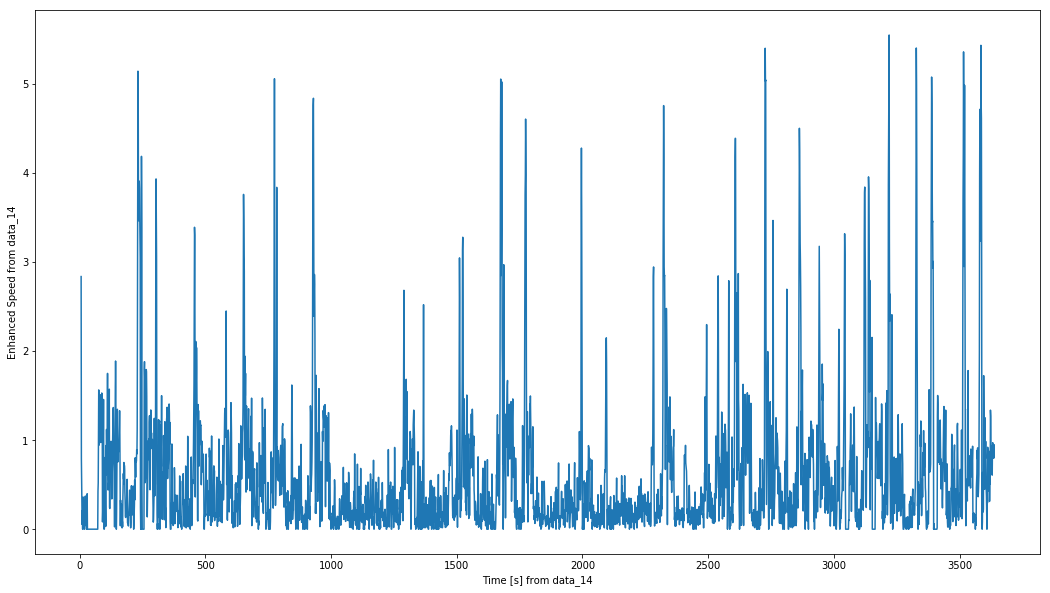

In [45]:
##Graph results: 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

print("Plotting...")
#x = das_14_time
#y = speed_14_array

#avg_time_array.pop(-1)
#avg_speed_array.pop(-1)

x = avg_time_array
y = avg_speed_array

#x_ticks = np.arange([])
#y_ticks = np.arange([])

plt.figure(figsize=(18,10))

plt.plot(x,y)
plt.xlabel('Time [s] from data_14')
plt.ylabel('Enhanced Speed from data_14')
#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels(x_ticks)
#frame1.axes.yaxis.set_ticklabels(y_ticks)

plt.show()

Plotting...


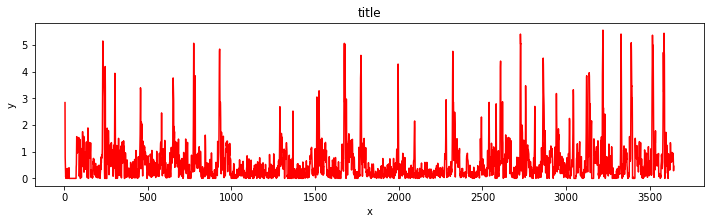

In [40]:
import matplotlib.pyplot as plt
print("Plotting...")
fig, axes = plt.subplots(figsize=(12,3))
x = avg_time_array
y = avg_speed_array
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [ ]:
#Label sections of velocity data as surfing/paddling/floating to visually see if looks theoretically correct? 
